> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.9 - Visualização de Dados

## Exercícios
Vamos trabalhar com as mesmas bases de dados do exercício de Pandas. Aqui estão os links caso você queira baixar novamente, mas recomendo trabalhar com o `wc_formatado.csv` que exportamos na questão Q2 do exercício anterior.

* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1930_2022.csv
* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1991_2023.csv

Para relembrar, essas são as colunas do dataframe:
```
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_1             1312 non-null   string        
 1   time_2             1312 non-null   string        
 2   gols_1             1312 non-null   int64         
 3   gols_2             1312 non-null   int64         
 4   data               1312 non-null   datetime64[ns]
 5   ano                1312 non-null   int64         
 6   país_sede          1312 non-null   string        
 7   comparecimento     1312 non-null   int64         
 8   resultado          1312 non-null   string        
 9   rodada             1312 non-null   category      
 10  gols_1_detalhes    970 non-null    string        
 11  gols_2_detalhes    771 non-null    string        
 12  gols_1_contra      57 non-null     string        
 13  gols_2_contra      30 non-null     string        
 14  gols_1_penalti     170 non-null    string        
 15  gols_2_penalti     119 non-null    string        
 16  cartao_vermelho_1  59 non-null     string        
 17  cartao_vermelho_2  65 non-null     string        
 18  cartao_amarelo_1   834 non-null    string        
 19  cartao_amarelo_2   857 non-null    string        
 20  copa               1312 non-null   string 
```

#### Q1.
Realize todos os imports necessários para executar as três bibliotecas de visualização que conhecemos:
* Matplotlib (lembre-se do comando mágico)
* Seaborn
* Plotly

Para cada uma delas, altere o tema padrão de visualização. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib inline

plt.style.use('ggplot')
sns.set_theme(context='notebook', style='darkgrid')

#### Q2.
Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna `comparecimento`.  

Lembre-se que alguns jogos estavam com público 0 incorretamente, que tal remover essas ocorrências para não atrapalhar sua visualzação?

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

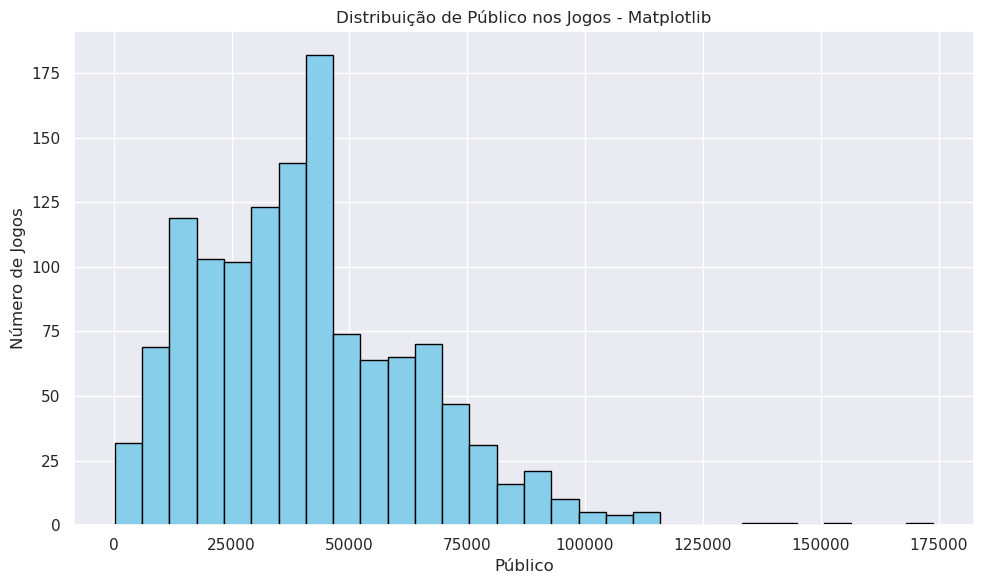

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',12)

df = pd.read_csv('wc_formatado.csv')

df_filtrado = df[df['comparecimento'] > 0] # remove jogos com público igual a 0

#### Solução com matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df_filtrado['comparecimento'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição de Público nos Jogos - Matplotlib')
plt.xlabel('Público')
plt.ylabel('Número de Jogos')
plt.tight_layout()
plt.show()

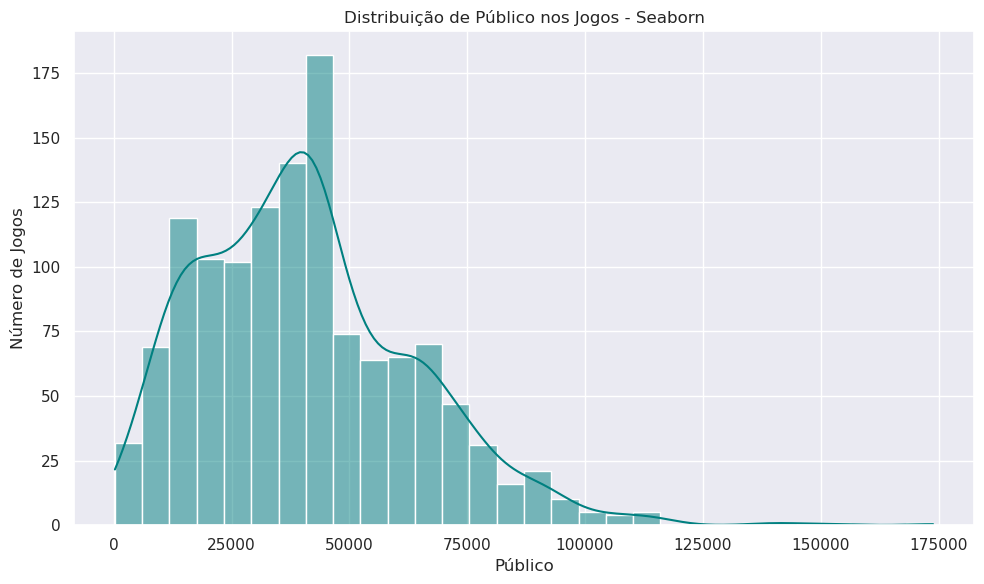

In [3]:
#### solução com seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df_filtrado['comparecimento'], bins=30, kde=True, color='teal')
plt.title('Distribuição de Público nos Jogos - Seaborn')
plt.xlabel('Público')
plt.ylabel('Número de Jogos')
plt.tight_layout()
plt.show()

In [4]:
#### solução com plotly
fig = go.Figure(
    data=go.Histogram(
        x=df_filtrado['comparecimento'],
        nbinsx=30,
        marker_color='orange'
    )
)

fig.update_layout(
    title='Distribuição de Público nos Jogos - Plotly',
    xaxis_title='Público',
    yaxis_title='Número de Jogos',
    template='plotly_dark',
    bargap=0.1
)

fig.show()

#### Q3.

Apresente um gráfico de dispersão (scatter) dos atributos `gols_1` e `gols_2`. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir
```python
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))
```

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

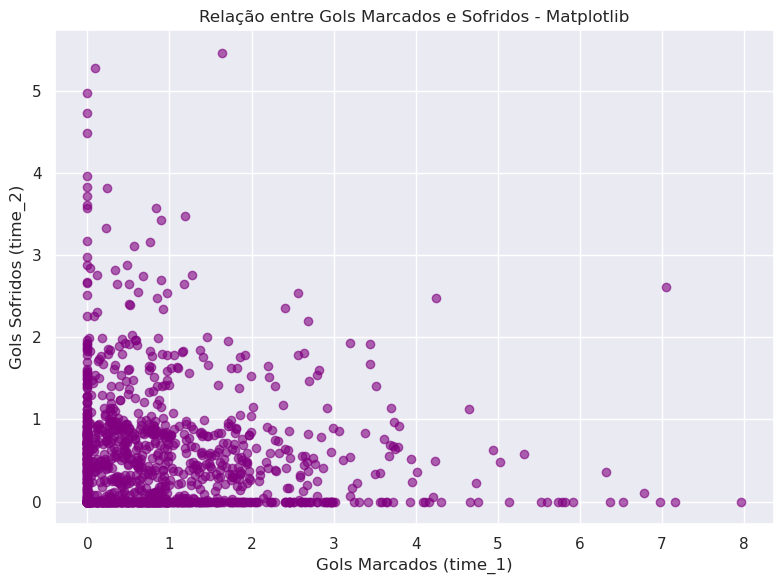

In [5]:
gols = df[['gols_1', 'gols_2']] * np.random.random((len(df), 2)) # cria o dataframe com distorção nos gols

#### solução com matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(gols['gols_1'], gols['gols_2'], alpha=0.6, color='purple')
plt.title('Relação entre Gols Marcados e Sofridos - Matplotlib')
plt.xlabel('Gols Marcados (time_1)')
plt.ylabel('Gols Sofridos (time_2)')
plt.grid(True)
plt.tight_layout()
plt.show()

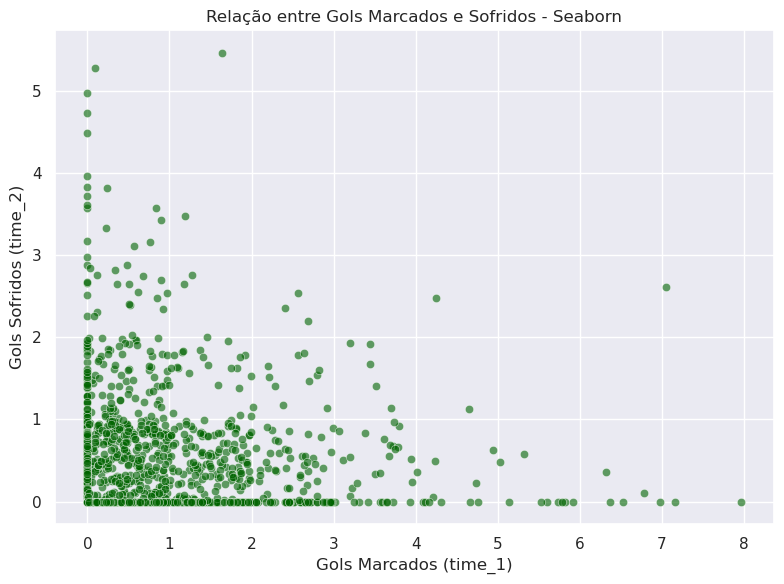

In [6]:
#### solução com seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=gols['gols_1'], y=gols['gols_2'], color='darkgreen', alpha=0.6)
plt.title('Relação entre Gols Marcados e Sofridos - Seaborn')
plt.xlabel('Gols Marcados (time_1)')
plt.ylabel('Gols Sofridos (time_2)')
plt.tight_layout()
plt.show()

In [7]:
#### solução com plotly
fig = go.Figure(
    data=go.Scatter(
        x=gols['gols_1'],
        y=gols['gols_2'],
        mode='markers',
        marker=dict(size=6, color='orange', opacity=0.6)
    )
)

fig.update_layout(
    title='Relação entre Gols Marcados e Sofridos - Plotly',
    xaxis_title='Gols Marcados (time_1)',
    yaxis_title='Gols Sofridos (time_2)',
    template='plotly_dark'
)

fig.show()

#### Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos:
* título
* rótulos de dimensão.
* legenda

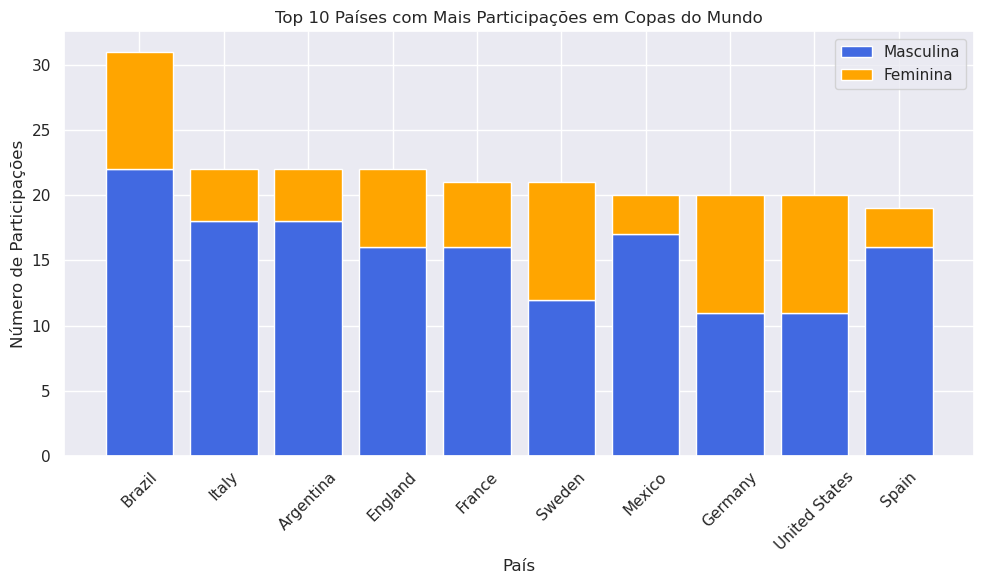

In [8]:
# Cria uma coluna que une ano e tipo de copa para identificar a edição
df['edicao'] = df['ano'].astype(str) + ' ' + df['copa']

# Junta os times da coluna time_1 e time_2 em um único DataFrame
pais_copa_1 = df[['edicao', 'copa', 'time_1']].rename(columns={'time_1': 'pais'})
pais_copa_2 = df[['edicao', 'copa', 'time_2']].rename(columns={'time_2': 'pais'})
todos_paises = pd.concat([pais_copa_1, pais_copa_2], ignore_index=True)

# Remove duplicatas para garantir que cada país/edição apareça só uma vez (participação única)
participacoes_unicas = todos_paises.drop_duplicates(subset=['pais', 'edicao'])

# Conta quantas participações (edições) cada país teve por tipo de copa (masculina/feminina)
contagem = participacoes_unicas.groupby(['pais', 'copa']).size().unstack(fill_value=0)

# Cria coluna total para ordenar países pelo número total de participações
contagem['total'] = contagem.sum(axis=1)

# Seleciona os top 10 países com mais participações
top10 = contagem.sort_values(by='total', ascending=False).head(10)

# Remove coluna total para simplificar os gráficos
top10_sem_total = top10.drop(columns='total')

#### solução com matplotlib
plt.figure(figsize=(10,6))

plt.bar(top10_sem_total.index, top10_sem_total['Masculina'], label='Masculina', color='royalblue')
plt.bar(top10_sem_total.index, top10_sem_total['Feminina'], bottom=top10_sem_total['Masculina'], label='Feminina', color='orange')

plt.title('Top 10 Países com Mais Participações em Copas do Mundo')
plt.xlabel('País')
plt.ylabel('Número de Participações')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

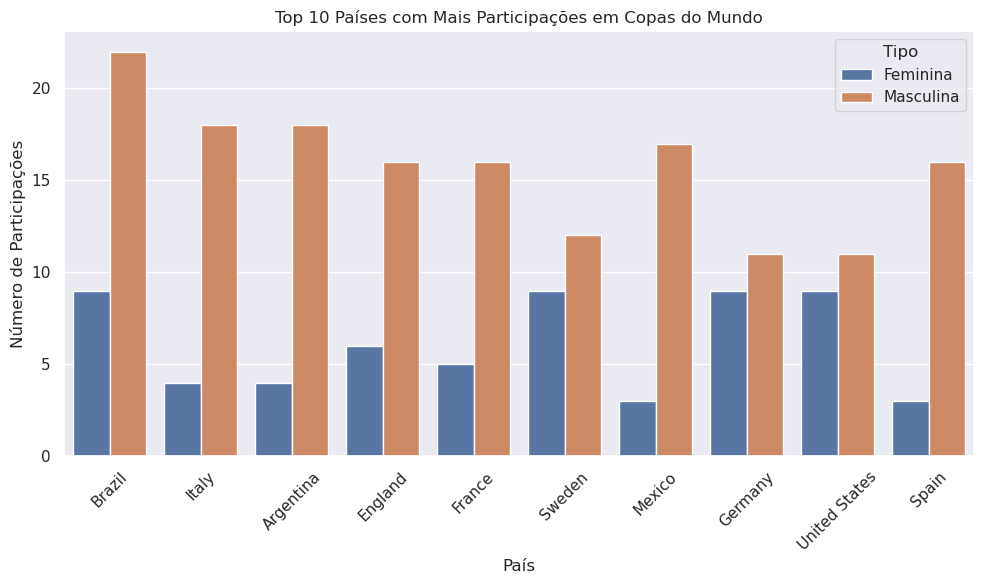

In [9]:
#### solução com seaborn
# Transforma tipos de participação para formato longo
top10_long = top10_sem_total.reset_index().melt(id_vars='pais', var_name='Tipo', value_name='Participações')

# Define ordem para os países para não bagunçar o eixo x (horizontal)
order = top10_sem_total.index.tolist()
top10_long['pais'] = pd.Categorical(top10_long['pais'], categories=order, ordered=True)

plt.figure(figsize=(10,6))
sns.barplot(data=top10_long, x='pais', y='Participações', hue='Tipo', order=order)

plt.title('Top 10 Países com Mais Participações em Copas do Mundo')
plt.xlabel('País')
plt.ylabel('Número de Participações')
plt.xticks(rotation=45)
plt.legend(title='Tipo')
plt.tight_layout()
plt.show()

In [10]:
#### solução com plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=top10_sem_total.index,
    y=top10_sem_total['Masculina'],
    name='Masculina',
    marker_color='royalblue'
))

fig.add_trace(go.Bar(
    x=top10_sem_total.index,
    y=top10_sem_total['Feminina'],
    name='Feminina',
    marker_color='orange'
))

fig.update_layout(
    barmode='stack',
    title='Top 10 Países com Mais Participações em Copas do Mundo',
    xaxis_title='País',
    yaxis_title='Número de Participações',
    template='plotly_dark'
)

fig.show()

#### Q5.

Vamos fazer um compilado com as estatísticas históricas de copas do mundo!

Com a biblioteca de sua preferência você deve criar 4 subplots organizados em um grid de 2 linhas e 2 colunas. Eles devem conter os seguintes gráficos:
* Linha 1, coluna 1: Gráfico de barras com a quantidade de jogos que aconteceram por ano
* Linha 1, coluna 2: Gráfico de área (referências a seguir) com o total de gols por ano, separando as informações de `gols_1` e `gols_2` para distinguir gols em casa e do time visitante.
* Linha 2, coluna 1: Gráfico de área com o total de cartões por ano, separando as informações de cartões amarelos e cartões vermelhos, mas agregando cartões do time 1 ou time 2. Ou seja, uma área com `cartao_amarelo_1 + cartao_amarelo_2` e outra área com `cartao_vermelho_1 + cartao_vermelho_2`.
* Linha 2, coluna 2: Gráfico de barras com o total de gols contra por ano, somando `gols_contra_1` e `gols_contra_2`.

Referências sobre gráfico de área
* Matplotlib: https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py
* Pandas + Matplotlib: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html
* Seaborn: https://seaborn.pydata.org/generated/seaborn.objects.Area.html
* Plotly: https://plotly.com/python/filled-area-plots/

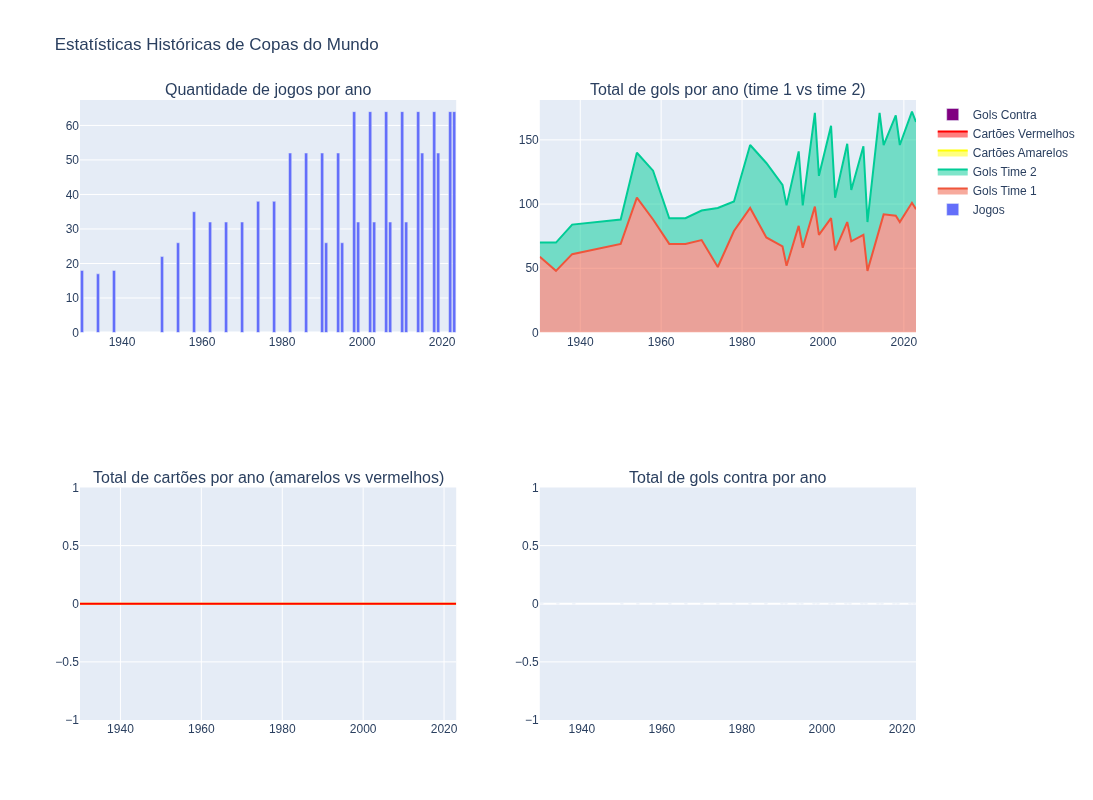

In [11]:
# Converte colunas de cartões e gols contra para numérico e substitui NaN por 0
for col in ['cartao_amarelo_1', 'cartao_amarelo_2', 'cartao_vermelho_1', 'cartao_vermelho_2', 'gols_1_contra', 'gols_2_contra']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# jogos por ano
jogos_por_ano = df.groupby('ano').size()

# gols por ano (time 1 e time 2)
gols_1_ano = df.groupby('ano')['gols_1'].sum()
gols_2_ano = df.groupby('ano')['gols_2'].sum()

# cartões por ano (soma times 1 e 2)
cartoes_amarelos_ano = df.groupby('ano')['cartao_amarelo_1'].sum() + df.groupby('ano')['cartao_amarelo_2'].sum()
cartoes_vermelhos_ano = df.groupby('ano')['cartao_vermelho_1'].sum() + df.groupby('ano')['cartao_vermelho_2'].sum()

# gols contra por ano
gols_contra_ano = df.groupby('ano')['gols_1_contra'].sum() + df.groupby('ano')['gols_2_contra'].sum()

# cria os subplots 2 linhas e 2 colunas
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "Quantidade de jogos por ano",
        "Total de gols por ano (time 1 vs time 2)",
        "Total de cartões por ano (amarelos vs vermelhos)",
        "Total de gols contra por ano"
    )
)

# 1) Gráfico de barras - jogos por ano
fig.add_trace(go.Bar(x=jogos_por_ano.index, y=jogos_por_ano.values, name='Jogos'), row=1, col=1)

# 2) Gráfico de área - gols por ano (time 1 e time 2)
fig.add_trace(go.Scatter(x=gols_1_ano.index, y=gols_1_ano.values, mode='lines', stackgroup='one', name='Gols Time 1'), row=1, col=2)
fig.add_trace(go.Scatter(x=gols_2_ano.index, y=gols_2_ano.values, mode='lines', stackgroup='one', name='Gols Time 2'), row=1, col=2)

# 3) Gráfico de área - cartões por ano (amarelos e vermelhos)
fig.add_trace(go.Scatter(x=cartoes_amarelos_ano.index, y=cartoes_amarelos_ano.values, mode='lines', stackgroup='two', name='Cartões Amarelos', line=dict(color='yellow')), row=2, col=1)
fig.add_trace(go.Scatter(x=cartoes_vermelhos_ano.index, y=cartoes_vermelhos_ano.values, mode='lines', stackgroup='two', name='Cartões Vermelhos', line=dict(color='red')), row=2, col=1)

# 4) Gráfico de barras - gols contra por ano
fig.add_trace(go.Bar(x=gols_contra_ano.index, y=gols_contra_ano.values, name='Gols Contra', marker_color='purple'), row=2, col=2)

# layout geral
fig.update_layout(
    height=800,
    width=1000,
    title_text="Estatísticas Históricas de Copas do Mundo",
    showlegend=True
)

fig.show()